In [9]:
# In this tutorial we solve first and secord order ordinary differential
# equations.
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# We will use 'odeint' from the 'SciPy' module.  'odeint' solve the differential
# equations numerically.  In this tutorial will will use differential equations
# that have exact analytical solutions so that we can verify that the solutions
# come out as expected.
from scipy.integrate import odeint

In [11]:
# First, we will solve the first-order differential equation that describes
# charging a capacitor C to a voltage V0 through a resistor R.
R = 1e3 # ohms
C = 1e-9 # Farads
V0 = 1 # volts

In [12]:
# The differential equation is V0 - R*(dq/dt) - q/C = 0.  To use odeint,
# we must define a function that returns dq/dt.  Therefore, our function
# will return dq/dt = V0/R -q/(RC).
def current(q,t):
    return V0/R - q/(R*C)

In [13]:
# Here is the list of times for which we would like to know q(t).
time = np.arange(0, 5e-6, 0.01e-6)

In [14]:
# Here is the call to odeint().  odeint returns the solution to the ode
# (in our case the charge).  The option between 'current' and 'time' is the
# intial condition q(0), i.e. the charge at time t = 0.
charge = odeint(current, 0, time)  

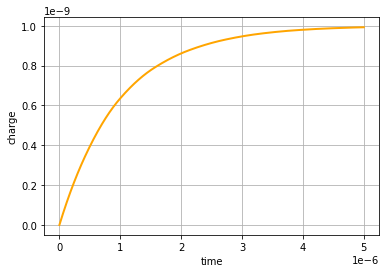

In [15]:
# Let's plot the charge as a function of time.  As expected, the charge 
# asymptotically approaches a constant,
plt.plot(time, charge, 'orange', linewidth = 2)
plt.xlabel('time')
plt.ylabel('charge')
plt.grid(True)

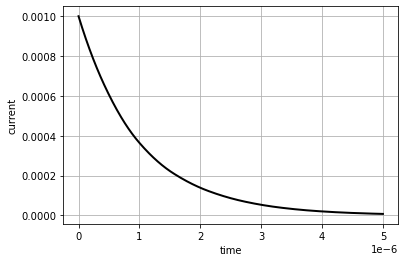

In [16]:
# We can also get the current in the circuit by calling our original function.
# As expected, it's an exponetial decay.
plt.plot(time, current(charge, time), 'black', linewidth = 2)
plt.xlabel('time')
plt.ylabel('current')
plt.grid(True)

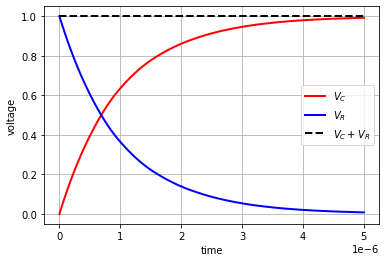

In [18]:
# If we wanted, we could plot the capacitor voltage q/C, the resistor voltage
# IR and their sum.
VC = charge/C
VR = current(charge, time)*R
plt.figure()
plt.plot(time, VC, 'r', linewidth = 2, label = r'$V_C$')
plt.plot(time, VR, 'b', linewidth = 2, label = r'$V_R$')
plt.plot(time, VC + VR, 'k--', linewidth = 2, label = r'$V_C + V_R$')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid(True)
plt.legend();
# Kirchhoff's voltage loop rule is confirmed!

In [19]:
# Solving a second-order differential equation is a little more tricky.
# The example that we will consider is a series LRC circuit connected to a
# battery with voltage V0 via a switch.  The differential equation is:
# V0 = Lq" + Rq' +q/C.  We'll use the R and C values as above.  Here is
# our value of L.
L = 20e-3 # Henries

In [20]:
# The strategy is to write the equation as a system of two first-order 
# equations.  This is achieved by first writing z[1] = q' and z[0] = q.
# In that case, or original second-order equation becomes:
# V0 = L*z[1]' + R*z[1] + z[0]/C

In [21]:
# Next, we create a function that returns q' and q'' (in that order).
# q' is easy because it is just q' = z[1]
# q" is z[1]', so we solve the equation above to get:
# q" = V0/L - (R/C)*z[1] -z[0]/(LC)
def q_derivatives(z,t):
    return [z[1], (V0/L) - (R/L)*z[1] - z[0]/(L*C)]

In [22]:
# Here is the list of desired times.
time = np.arange(0, 0.2e-3, 0.001e-3)

In [23]:
# Here is the call to 'odeint()'.  This time we need to pass an array
# of initial conditions, the first is for q(0) and the second is for q'(0).
# The .T is necessary so that we can separately unpack the solutions as
# charge and current (not intuitive, in my opinion).
charge, current = odeint(q_derivatives, [0, 0], time).T    

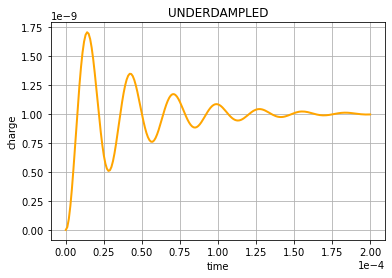

In [25]:
# A plot of the charge as a function of time.
plt.plot(time, charge, 'orange', linewidth = 2)
plt.xlabel('time')
plt.ylabel('charge')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

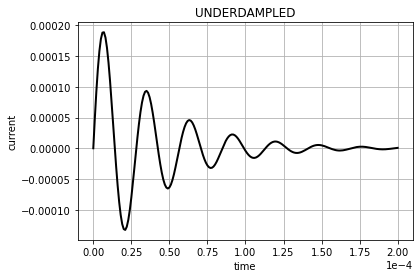

In [27]:
# A plot of the ccurrent as a function of time.
plt.plot(time, current, 'black', linewidth = 2)
plt.xlabel('time')
plt.ylabel('current')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

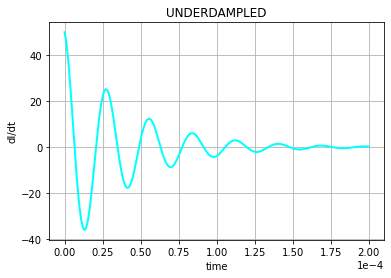

In [28]:
# We can call our model to access dI/dt.  The _, is just a place holder for
# a variable that we're not going to use.  That part of the model returns
# I (or q'), but we already have that solution from 'odeint'.
_, dIdt = q_derivatives([charge, current], time)
plt.plot(time, dIdt, 'cyan', linewidth = 2)
plt.xlabel('time')
plt.ylabel('dI/dt')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)

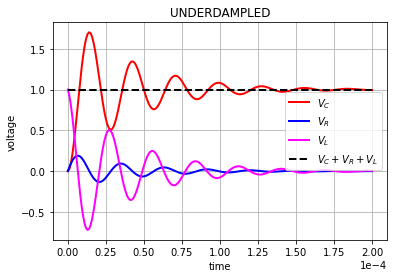

In [29]:
# Like we did above, we can now calculate the voltages across the various
# components and their sum.
VC = charge/C
VR = current*R
VL = dIdt*L
plt.figure()
plt.plot(time, VC, 'r', linewidth = 2, label = r'$V_C$')
plt.plot(time, VR, 'b', linewidth = 2, label = r'$V_R$')
plt.plot(time, VL, 'magenta', linewidth = 2, label = r'$V_L$')
plt.plot(time, VC + VR + VL, 'k--', linewidth = 2, label = r'$V_C + V_R + V_L$')
plt.xlabel('time')
plt.ylabel('voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('UNDERDAMPLED')
plt.grid(True)
plt.legend();
# Kirchhoff's voltage loop rule is confirmed again!  Notice, however, that is 
# behaviour is more complicated.  The instantaneous voltage across the capacitor
# can be greater than the battery voltage.  Nevertheless, the loop rule is 
# preserved at all times (because the inductor and resistor voltages can go
# negative).

In [30]:
# The LRC solution above was for an underdamped oscillator.  We can easily
# see the transient behaviour of an overdampled oscillator be running the same
# code again after changing only a single parameter.
R = 2e4 # ohms

In [31]:
# Here is the list of desired times.
time = np.arange(0, 0.15e-3, 0.0005e-3)

In [32]:
# Here we go again...
charge, current = odeint(q_derivatives, [0, 0], time).T    

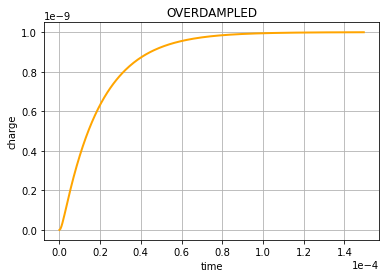

In [34]:
# The charge...
plt.plot(time, charge, 'orange', linewidth = 2)
plt.xlabel('time')
plt.ylabel('charge')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('OVERDAMPLED')
plt.grid(True)

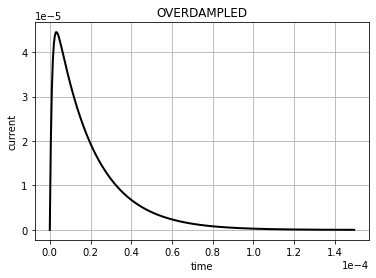

In [35]:
# ... and current.
plt.plot(time, current, 'black', linewidth = 2)
plt.xlabel('time')
plt.ylabel('current')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('OVERDAMPLED')
plt.grid(True)

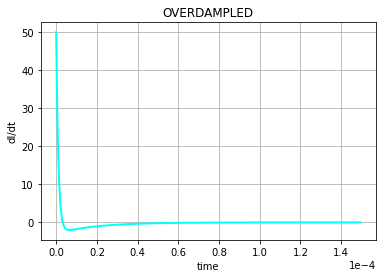

In [36]:
# We can call our model to access dI/dt.  The _, is just a place holder for
# a variable that we're not going to use.  That part of the model returns
# I (or q'), but we already have that solution from 'odeint'.
_, dIdt = q_derivatives([charge, current], time)
plt.plot(time, dIdt, 'cyan', linewidth = 2)
plt.xlabel('time')
plt.ylabel('dI/dt')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('OVERDAMPLED')
plt.grid(True)

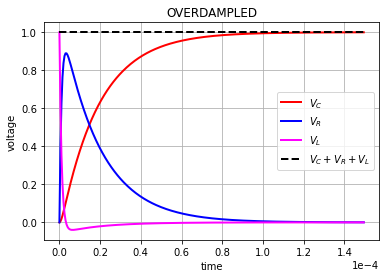

In [37]:
# Like we did above, we can now calculate the voltages across the various
# components and their sum.
VC = charge/C
VR = current*R
VL = dIdt*L
plt.figure()
plt.plot(time, VC, 'r', linewidth = 2, label = r'$V_C$')
plt.plot(time, VR, 'b', linewidth = 2, label = r'$V_R$')
plt.plot(time, VL, 'magenta', linewidth = 2, label = r'$V_L$')
plt.plot(time, VC + VR + VL, 'k--', linewidth = 2, label = r'$V_C + V_R + V_L$')
plt.xlabel('time')
plt.ylabel('voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('OVERDAMPLED')
plt.grid(True)
plt.legend();

In [38]:
# Finally, we can adjust R so that we acheive the critically-damped
# transient response.
R = 2*np.sqrt(L/C) # ohms
print('The LRC circuit is critically-damped when R =', R, 'ohms.')

The LRC circuit is critically-damped when R = 8944.27190999916 ohms.


In [39]:
# Here is the list of desired times.
time = np.arange(0, 0.05e-3, 0.001e-3)

In [40]:
# Here we go again...
charge, current = odeint(q_derivatives, [0, 0], time).T    

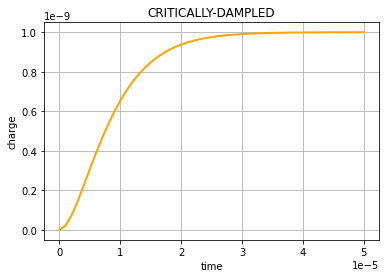

In [41]:
# The charge...
plt.plot(time, charge, 'orange', linewidth = 2)
plt.xlabel('time')
plt.ylabel('charge')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('CRITICALLY-DAMPLED')
plt.grid(True)

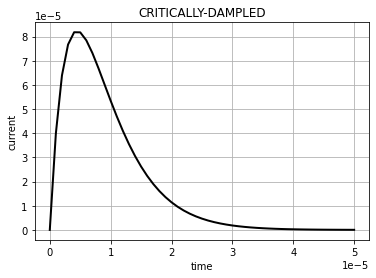

In [42]:
# ... and current.
plt.plot(time, current, 'black', linewidth = 2)
plt.xlabel('time')
plt.ylabel('current')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('CRITICALLY-DAMPLED')
plt.grid(True)

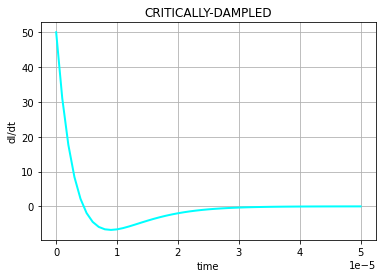

In [43]:
# We can call our model to access dI/dt.  The _, is just a place holder for
# a variable that we're not going to use.  That part of the model returns
# I (or q'), but we already have that solution from 'odeint'.
_, dIdt = q_derivatives([charge, current], time)
plt.figure()
plt.plot(time, dIdt, 'cyan', linewidth = 2)
plt.xlabel('time')
plt.ylabel('dI/dt')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('CRITICALLY-DAMPLED')
plt.grid(True)

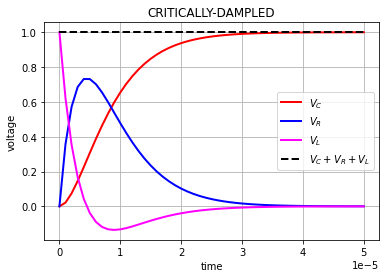

In [44]:
# Like we did above, we can now calculate the voltages across the various
# components and their sum.
VC = charge/C
VR = current*R
VL = dIdt*L
plt.figure()
plt.plot(time, VC, 'r', linewidth = 2, label = r'$V_C$')
plt.plot(time, VR, 'b', linewidth = 2, label = r'$V_R$')
plt.plot(time, VL, 'magenta', linewidth = 2, label = r'$V_L$')
plt.plot(time, VC + VR + VL, 'k--', linewidth = 2, label = r'$V_C + V_R + V_L$')
plt.xlabel('time')
plt.ylabel('voltage')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.title('CRITICALLY-DAMPLED')
plt.grid(True)
plt.legend();